In [1]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from io import StringIO #used to convert string to a dataframe
from scipy.optimize import curve_fit #used to find the fit parameters

# Emperical Modeling - Practice Test

The goal of this assignment is to find an emperical model for a given data set and use this model to make predictions and form conclusions. You may use any of the notebooks from our class, but you may not use any other sources.

Interpreting a graph is often used when answering a question. In this case, it is acceptable to approximate values you read from a graph.


## The Problem

In 2011, physics students Tiffany Byerly and Amelia Morgan did a project to measure their walking gait before and after running on a treadmill. They wanted to see if running on a treadmill for 5 minutes affects how a person walks immediately after running on the treadmill. Using video analysis software, they measured and plotted the approximate $(x,y)$ coordinate of Tiffany's center of mass in meters as a function of time in seconds. A screen capture of the video of one of their trials, after running on a treadmill, is shown below.

![](https://raw.githubusercontent.com/atitus/math-modeling/master/unit-02/02-practice/gait.png)

The origin of the x,y coordinate system is at the intersection of the purple lines in the bottom left corner of the image. The origin is $(x=0,y=0)$, and the horizontal purple line represents the x-axis in space and the vertical purple line represents the y axis in space. The image below shows how her x-position indicates how far she is horizontally from the origin. Her y-position indicates how far she is vertically from the origin.

![](https://raw.githubusercontent.com/atitus/math-modeling/master/unit-02/02-practice/gait-coord-system.png)

If $t$ is time, when she walks, we can graph $x$ vs. $t$ to figure out how she moves horizontally when walking. And we can graph $y$ vs. $t$ to figure out how she moves vertically when walking.


## Data Set

Tiffany's data is in the file [gait-data.txt](https://raw.githubusercontent.com/atitus/math-modeling-2/main/unit-03/03-10-practice/gait-data.txt).



## Exercise 1

1. Plot a graph of $x$ position (in meters) as a function of time for Tiffany's motion. Fit a linear model to the data of the form:

  $$y = mx + b$$

  where $y$ represents the dependent variable and $x$ represents the independent variable. **Note: the x-position $x$ is not the same as the independent variable x in our model equation**. The variable $x$ means different things in different contexts. This can be confusing. I suggest using the label "x position" instead of "x" for your axis label when you plot your data.

2. Print the best-fit parameters.


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/atitus/math-modeling-2/main/unit-03/03-10-practice/gait-data.txt", sep="\t")
print(df.head())

   time (s)  x position (m)  y position (m)
0     0.594        4.275412        1.250836
1     0.627        4.201368        1.244909
2     0.660        4.153581        1.235174
3     0.693        4.088167        1.233792
4     0.726        4.040196        1.232779


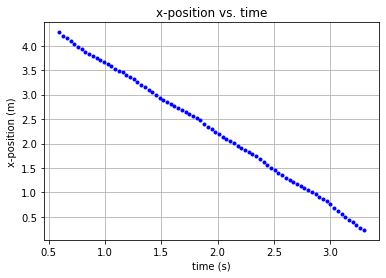

In [9]:
xdata = df['time (s)']
ydata = df['x position (m)']

plt.figure()
plt.title("x-position vs. time")
plt.xlabel("time (s)")
plt.ylabel("x-position (m)")
plt.plot(xdata,ydata,"b.")
plt.grid()
plt.show()

[-1.46130092  5.12535574]


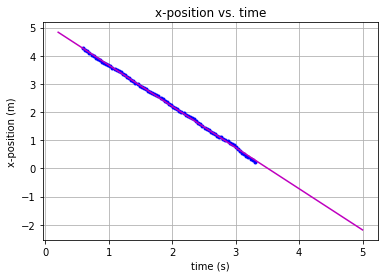

In [10]:
model = lambda x,m,b: m*x+b

# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata, ydata, p0=guess)

# calculate points for the model
xmodel = np.linspace(0.2,5,100)
ymodel = model(xmodel,*params)
print(params)

plt.figure()
plt.title("x-position vs. time")
plt.xlabel("time (s)")
plt.ylabel("x-position (m)")
plt.plot(xdata,ydata,"b.")
plt.plot(xmodel,ymodel, "m-")
plt.grid()
plt.show()

3. Tiffany's x-velocity is the slope. The absolute value is her speed, and the negative sign indicates that she is walking to the left. According to your model, what will Tiffany's x-position be at $t=5$ s?  What was her position at $t=0.2$ s?

We can answer this by examining the graph or by using our model and substituting the values of $t$ and our curve fit parameters.

Using the graph and estimating the value of the x-position, at $t=0.2$ s, $x$ is approximately 4.8 m. At $t=5$ s, $x$ is approximately -2.2 m.

4. What do you think the fit parameter $b$ tells you? (Don't just say "y intercept." Rather tell me what it means in the context of Tiffany's walking.

The parameter $b$ is the value of the x-position at $t=0$. Thus, it's Tiffany's starting x-position at $t=0$.

## Exercise 2

1. Plot data for Tiffany's y-position as a function of time and use an automatic fit to find the best-fit parameters for the model:

  $$y = A\cos(Bx + C) + D$$


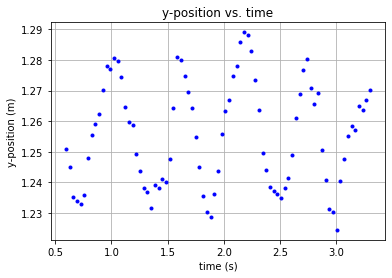

In [12]:
xdata = df['time (s)']
ydata = df['y position (m)']

plt.figure()
plt.title("y-position vs. time")
plt.xlabel("time (s)")
plt.ylabel("y-position (m)")
plt.plot(xdata,ydata,"b.")
plt.grid()
plt.show()

[-0.0217484  11.01691454 -1.8955434   1.256067  ]


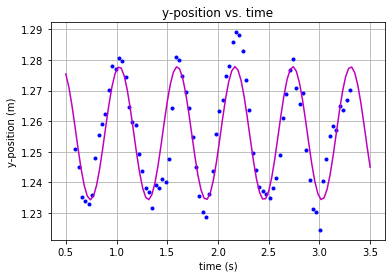

In [14]:
model = lambda x,A,B,C,D: A*np.cos(B*x+C)+D

# Find best fit parameters
guess=[0.1,10,1,1] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata, ydata, p0=guess)

# calculate points for the model
xmodel = np.linspace(0.5,3.5,100)
ymodel = model(xmodel,*params)
print(params)

plt.figure()
plt.title("y-position vs. time")
plt.xlabel("time (s)")
plt.ylabel("y-position (m)")
plt.plot(xdata,ydata,"b.")
plt.plot(xmodel,ymodel, "m-")
plt.grid()
plt.show()

Use the values of your curve fit parameters to answer the following questions:

2. What is approximately the average $y$ value as she is walking?
3. How far does she travel up and down (from lowest point to highest point) while walking? Don't use data to answer your question. Rather, use the best-fit function and/or curve fit parameters.
4. Think about yourself walking and how the height of your center of mass varies as you walk. When the heel of your front foot and toes of your back foot are both touching the ground at the same time (feet spread a maximum distance apart), is the y-position of your body at a maximum or a minimum on the graph?
5. How many steps per second does she take?


2. Her average y-value is the value of $D$, 1.256 m.
3. She travels up and down approximately 0.04 m between her lowest point and highest point (of the curve fit).
4. If your legs are spread apart, then your waist is at its lowest point which is a minimum on the graph.
5. One step is from a peak to the next peak or a minimum to the next minimum. This is approximately 0.6 s. So one step in 0.6 s is $1/0.6=1.7$ steps per second.